
# <p style="text-align: center;">MIS 382N: ADVANCED PREDICTIVE MODELING - MSBA</p>
# <p style="text-align: center;">Assignment 2</p>
## <p style="text-align: center;">Total points: 85 </p>
## <p style="text-align: center;">Due: Thursday, October 3rd, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Your partner needs to be from the same section. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTEID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TA know. 

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1. Bias-variance (30pts)
Use the following code to read in a small set of data and divide it into training and testing sets. Inputs are x; outputs are y.

In [104]:
import numpy as np
np.random.seed(11)
x_train = np.loadtxt("X_q0_train.csv").reshape(-1,1)
y_train = np.loadtxt("Y_q0_train.csv").reshape(-1,1)
x_test = np.loadtxt("X_q0_test.csv").reshape(-1,1)
y_test = np.loadtxt("Y_q0_test.csv").reshape(-1,1)
x_all = np.linspace(-10,10,101).reshape(-1,1)

We want to build a model that can predict y for unknown inputs x.

(a) (10pts) Fit a linear model to the training data, and report mean squared error on the test data. Plot the data (y_train vs x_train and y_test vs x_test), fitted model (prediction on x_all vs x_all), and predictions on the test set (prediction on x_test vs x_test), clearly denoting the training, testing, and predicted points. All the plots must be in the same figure and be clearly labeled.

(b) (15pts) Fit polynomial models of degrees 2, 3 and 4, and the two given MLP Regression models (these two models will run for a different number of iterations when you fit them) to the training data. Report mean squared error (on both train and test sets) for all the models. Plot the data (y_train vs x_train and y_test vs x_test), the fitted models (prediction on x_all by different models vs x_all), and the predictions on the test set (prediction on x_test by different models vs x_test). All the plots must be in the same figure and be clearly labeled.

(c) (5pts) Which of the polynomial models performed the best? Explain using the bias-variance tradeoff.


In [2]:
#MLP Regression models for (b)
from sklearn.neural_network import MLPRegressor
mlp_1 = MLPRegressor(hidden_layer_sizes=100, alpha=0.001, max_iter=2000, activation='tanh')
mlp_2 = MLPRegressor(hidden_layer_sizes=100, alpha=0.001, max_iter=200,  activation='tanh')

In [3]:
#some useful code for plotting
# ax.plot(x_test, y_pred, 'blue', marker='o', )
# ax.plot(x_all, y_all, 'g')

## Answer
(a)

Mean Squared Error on Test Data: 1204.25


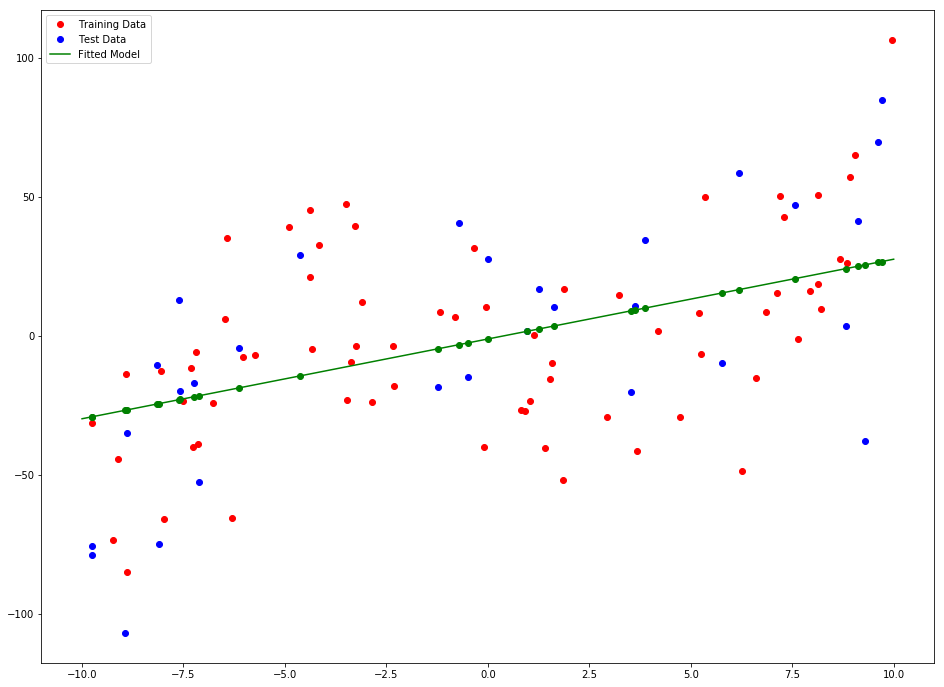

In [82]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

MLR1 = linear_model.LinearRegression()
MLR1.fit(x_train, y_train)

print("Mean Squared Error on Test Data: %.2f"
      % mean_squared_error(y_test, MLR1.predict(x_test)))

plt.figure(figsize = [16, 12])
plt.plot(x_train, y_train, "or", label = "Training Data")
plt.plot(x_test, y_test, "ob", label = "Test Data")
plt.plot(x_all, MLR1.predict(x_all), "g-", label = "Fitted Model")
plt.plot(x_test, MLR1.predict(x_test), "go")
plt.legend(loc = "best")
plt.show()

(b)

Mean Squared Errors For Training Data -
mlp_1: 647.23
mlp_2: 1032.03
Polynomial (Degree of 2): 1332.03
Polynomial (Degree of 3): 920.91
Polynomial (Degree of 4): 3853.02
Mean Squared Errors For Test Data -
mlp_1: 1098.82
mlp_2: 1457.89
Polynomial (Degree of 2): 1743.83
Polynomial (Degree of 3): 1014.53
Polynomial (Degree of 4): 5589.58


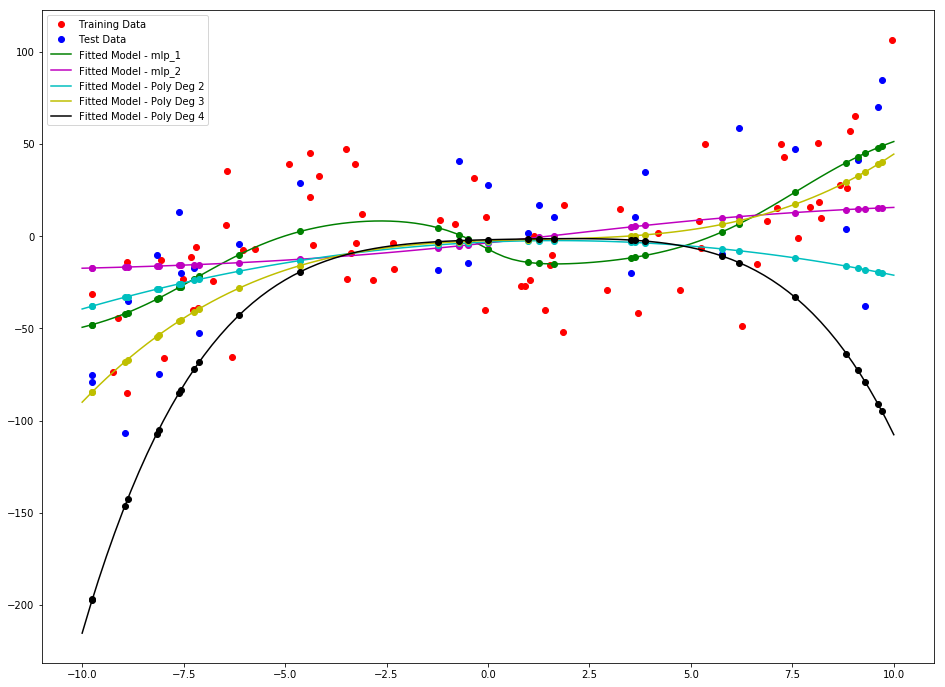

In [107]:
import warnings
warnings.simplefilter('ignore', np.RankWarning)

from sklearn.neural_network import MLPRegressor
mlp_1 = MLPRegressor(hidden_layer_sizes=100, alpha=0.001, max_iter=2000, activation='tanh', random_state = 11)
mlp_2 = MLPRegressor(hidden_layer_sizes=100, alpha=0.001, max_iter=200,  activation='tanh', random_state = 11)

x_train_1 = x_train[0,:]
y_train_1 = y_train[0,:]
x_test_1 = x_test[0,:]
y_test_1 = y_test[0,:]
x_all_1 = x_all[0,:]

mlp_1.fit(x_train, y_train)
mlp_2.fit(x_train, y_train)
poly2 = np.polyfit(x_train_1, y_train_1, 2)
poly3 = np.polyfit(x_train_1, y_train_1, 3)
poly4 = np.polyfit(x_train_1, y_train_1, 4)

print("Mean Squared Errors For Training Data -")
print("mlp_1: %.2f" % mean_squared_error(y_train, mlp_1.predict(x_train)))
print("mlp_2: %.2f" % mean_squared_error(y_train, mlp_2.predict(x_train)))
print("Polynomial (Degree of 2): %.2f" % mean_squared_error(y_train, np.polyval(poly2, x_train)))
print("Polynomial (Degree of 3): %.2f" % mean_squared_error(y_train, np.polyval(poly3, x_train)))
print("Polynomial (Degree of 4): %.2f" % mean_squared_error(y_train, np.polyval(poly4, x_train)))

print("Mean Squared Errors For Test Data -")
print("mlp_1: %.2f" % mean_squared_error(y_test, mlp_1.predict(x_test)))
print("mlp_2: %.2f" % mean_squared_error(y_test, mlp_2.predict(x_test)))
print("Polynomial (Degree of 2): %.2f" % mean_squared_error(y_test, np.polyval(poly2, x_test)))
print("Polynomial (Degree of 3): %.2f" % mean_squared_error(y_test, np.polyval(poly3, x_test)))
print("Polynomial (Degree of 4): %.2f" % mean_squared_error(y_test, np.polyval(poly4, x_test)))

plt.figure(figsize = [16, 12])
plt.plot(x_train, y_train, "or", label = "Training Data")
plt.plot(x_test, y_test, "ob", label = "Test Data")
plt.plot(x_all, mlp_1.predict(x_all), "g-", label = "Fitted Model - mlp_1")
plt.plot(x_test, mlp_1.predict(x_test), "go")
plt.plot(x_all, mlp_2.predict(x_all), "m-", label = "Fitted Model - mlp_2")
plt.plot(x_test, mlp_2.predict(x_test), "mo")
plt.plot(x_all, np.polyval(poly2, x_all), "c-", label = "Fitted Model - Poly Deg 2")
plt.plot(x_test, np.polyval(poly2, x_test), "co")
plt.plot(x_all, np.polyval(poly3, x_all), "y-", label = "Fitted Model - Poly Deg 3")
plt.plot(x_test, np.polyval(poly3, x_test), "yo")
plt.plot(x_all, np.polyval(poly4, x_all), "k-", label = "Fitted Model - Poly Deg 4")
plt.plot(x_test, np.polyval(poly4, x_test), "ko")
plt.legend(loc = "best")
plt.show()

(c) 

Answer: The polynomial model that fit best was the model set to a degree of 3. The reason for this is that increasing the degree lowers variance, which decreases MSE, but increases bias, which increases MSE. For each subsequent degree, the change in variance has a smaller impact and the change in bias has a larger impact. This is known as the bias-variance tradeoff. The Poly3 model fit best because of all the models, it decreased variance the most without causing bias to increase by a greater amount.

# Question 2. Number of data points required for Linear Regression (30pts)

In this question, we will explore empirically estimating a known data distribution. Let the data be generated by the probabilistic model $y_i = w^T x_i + \epsilon$. Here $x$ is 10 dimensional, and it's features are uniformly drawn values from $0$ to $1$. The true coefficients $w$ are set to be $1, 2, 3, \dots, 10$. Epsilon is drawn from a 0 mean unit variance normal distribution. We can now estimate these true coefficients by using linear regression on sample data points from the distribution. 

1. Generate 100 sample points $(x, y)$ according to the above distribution. Use the [np.matmul](https://docs.scipy.org/doc/numpy/reference/generated/numpy.matmul.html) function. (2pts)
2. Fit a linear regression model through the above data and report the MSE. (3 pts)
3. Generate 50 sample points $(x, y)$ to be the test set. Now, generate different amounts of train data points ranging from 20 data points to 1000 data points (intervals of 1) and plot how the MSE varies with increasing the train data. At the point where the MSE is minimum, print the corresponding coefficients. (10pts)
4. In this question, since we know the true coefficients, we can investigate how close the estimated coefficients are to the true coefficients. We will use $MSE(coefficients)$ which is MSE between the true coefficients and the estimated coefficients as the metric to see how close the estimated coefficients are to the true coefficients; this is not to be confused with the MSE between the predicted $y$ and the true $y$ which is commonly used. Hence, $MSE(coefficients) = \frac{1}{num\_coefficients}\sum_{i=1}^{num\_coefficients} (\theta_i - \hat{\theta}_i)^2$ where $\theta_i$ are the true coefficients and $\hat{\theta}_i$ are the estimated coefficients.
Using the $MSE(coefficients)$ as the metric, about how many data points are required to have $MSE(coefficients)$ < 0.01? (run this for 10 trials and report the average number of data points it takes). Now, use only the first three coefficients, generate $x$ which is 3 dimensional (instead of 10 dimensional as before) and the corresponding $y$ for each $x$. In this case, when $x$ is three dimensional, how many data points are required to have $MSE(coefficients)$ < 0.01? (run this for 10 trials and report the average number of data points it takes).(15pts)


In [4]:
#some useful code
# w_true = np.arange(10)+1
# x = np.random.uniform(size=(n, 10))
# e = np.random.normal(size=(n))


#for (30)
#use - 
#for num_data_points in range(20, 1001):

#for 5) the following code is useful:
# w_true_3 = w_true[0:3]
# x_3_dimensional = np.random.uniform(size=(n, 3))

1.

In [94]:
import numpy as np

np.random.seed(11)

w_true = np.arange(10) + 1
x = np.random.uniform(size = (100, 10))
e = np.random.normal(size = (100))

y = np.matmul(x, w_true) + e

2.

In [96]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

MLR2 = linear_model.LinearRegression()
MLR2.fit(x, y)

print("MSE: %.2f"
      % mean_squared_error(y, MLR2.predict(x)))

MSE: 1.01


3.

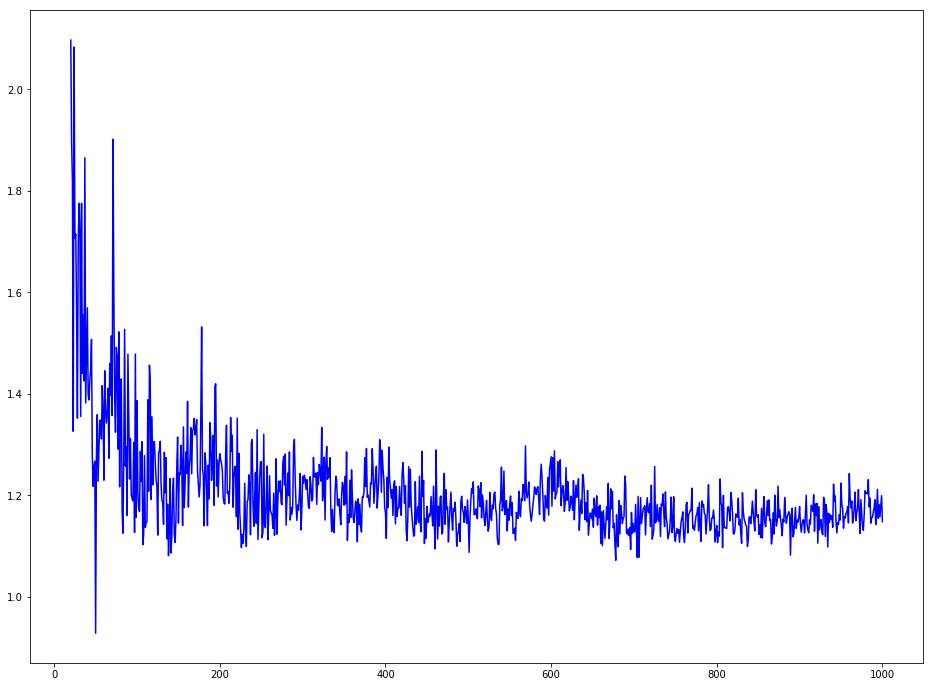

Best Coefficients for Test Data: [ 0.94310504  1.93698253  3.17463212  4.03288569  4.84978138  5.88843051
  7.05572524  7.86836361  9.12551697 10.02640396]


In [103]:
np.random.seed(11)

w_true = np.arange(10) + 1
x_test = np.random.uniform(size = (50, 10))
e = np.random.normal(size = (50))

y_test = np.matmul(x_test, w_true) + e

MLR3 = linear_model.LinearRegression()
MSE_list = []

for n in range(20, 1001):
    np.random.seed(11)
    
    w_true = np.arange(10) + 1
    x = np.random.uniform(size = (n, 10))
    e = np.random.normal(size = (n))

    y = np.matmul(x, w_true) + e
    
    MLR3.fit(x, y)
    MSE_list.append(mean_squared_error(y_test, MLR3.predict(x_test)))
    
    if mean_squared_error(y_test, MLR3.predict(x_test)) == min(MSE_list):
        MLR_best = MLR3

plt.figure(figsize = [16, 12])
plt.plot(range(20,1001), MSE_list, "b-")
plt.show()

print("Best Coefficients for Test Data: {}".format(MLR_best.coef_))

4. 

# Question 3. Data Imputation Strategies (20pts)

The missing value problem is inevitable in predictive modeling and in order to build a useful model, it is important that these missing values are handled appropriately. There could be many reasons for the presence of missing values(represented as NaN in python) in the dataset, like the absence of information corresponding to the variable, failure to record the available value of the variable, some unknown semantics associated with NaN, etc. 

For the given dataset(file named q3_dataset.csv), fit a Linear Regression model to predict the dependent variable 'ViolentCrimesPerPop'. If you directly try to fit a model you would see an error saying that input contains NaN. So, in order to successfully fit a model, you need to handle these missing values and the performance of your model would depend on how you handle them. 

Your task is to try different imputation strategies for the different columns having missing values and see what works best. You could try the following -
1. Discard rows with missing data
2. Fill NaNs with 0s
3. Fill NaNs with column mean/mode/median
4. Use information from related columns (think of how you could do this)

A strategy could work better for one column and not work for another. Briefly justify why do you think that a particular strategy works better than the other.

Hint: Think about how do the missing values occur for a particular column like are they random or systematic, do they have any semantics?

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
import numpy as np

dataset = pd.read_csv('q3_dataset.csv')
print("Column-wise missing value percentage")
print(dataset.isnull().sum()/len(dataset)*100)

X = dataset.drop(['ViolentCrimesPerPop'],axis=1)
Y = dataset['ViolentCrimesPerPop']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.30, random_state=11)


Column-wise missing value percentage
ViolentCrimesPerPop     0.000000
PolicBudgPerPop        84.002006
population              9.979940
householdsize          19.959880
numbUrban               7.321966
pctUrban                0.000000
medIncome               0.000000
perCapInc               0.000000
LandArea                0.000000
PopDens                 0.000000
PolicCars              84.002006
PctUnemployed           4.964895
PctEmploy               4.964895
dtype: float64


### Answer

# Question 4. PCA (conceptual) (5pts)

True or False : The goal of PCA is to create a lower-dimensional representation with principal components that are best at predicting the output variable.
Justify your answer

Answer: